<a href="https://colab.research.google.com/github/FernandoBRdgz/inteligencia_artificial/blob/main/redes_generativas_adversarias/introducci%C3%B3n_a_gans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

from IPython import display

In [2]:
(X_train, _), _ = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32) / 255

In [3]:
BATCH_SIZE = 128

dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=False).prefetch(1)

In [4]:
def plot_multiple_images(images, n_cols=None, epoch=0):
    display.clear_output(wait=False)
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1

    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)

    fig = plt.figure(figsize=(n_cols, n_rows))
    fig.suptitle(f"Epochs {epoch}", fontsize="x-large")
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")
  
    # plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))

### Generador

In [5]:
random_normal_dimensions = 32

generator = Sequential()
generator.add(Dense(64, activation="selu", input_shape=[random_normal_dimensions]))
generator.add(Dense(128, activation="selu"))
generator.add(Dense(28 * 28, activation="sigmoid"))
generator.add(Reshape([28, 28]))

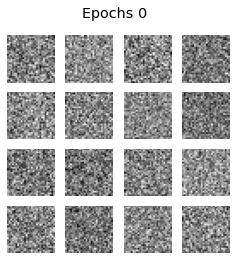

In [6]:
test_noise = tf.random.normal([16, random_normal_dimensions])
test_image = generator(test_noise)
plot_multiple_images(test_image, n_cols=4)

**Por hacer**

* Cambiar a GPU
* Descripción de la arquitectura
* Comentarios a las funciones
* Discriminador
* Entrenamiento
* Visualizaciones por épocas
* Referencias